In [1]:
import pandas as pd
import numpy as np
import os
import ipaddress
from urllib.parse import urlparse, parse_qs
import string
import pandas as pd
import math
from collections import Counter
import socket
import geoip2.database
from datetime import datetime
import tldextract
import pandas as pd
from ipwhois import IPWhois
from datetime import datetime
import dnstwist
import dnstwist
import urllib
import re
import whois
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('malicious_url_dataset.csv')

In [3]:
data.head()

,url,label
0,https://www.susanegan.net,benign
1,salvagervs.com,malicious
2,https://www.mvrsimulation.com,benign
3,https://www.paint-by-threads.com,benign
4,http://www.istracentrum.sk/fotogalerie/categor...,malicious


In [4]:
data.shape

(1132460, 2)

In [5]:
#URL Length
data['url_length'] = data['url'].str.len()

In [6]:
#CheckIPAsHostName Binary Check if IP address is used as hostname
def is_ip_address(url):
    try:
        hostname = urlparse(url).hostname
        # Check if the hostname is an IP address
        ipaddress.ip_address(hostname)
        return True
    except ValueError:
        return False

# Apply the function to the DataFrame column
data['is_ip'] = data['url'].apply(is_ip_address)

In [7]:
#CheckEXE Binary To look the presence of .exe in URL
# Function to check if '.exe' is in the URL
def contains_exe(url):
    return '.exe' in url.lower()

# Apply the function to the DataFrame column
data['contains_exe'] = data['url'].apply(contains_exe)

In [8]:
#Function to compute the digit to alphabet ratio
def digit_alphabet_ratio(url):
    digits = sum(c.isdigit() for c in url)
    alphabets = sum(c.isalpha() for c in url)
    # Prevent division by zero
    if alphabets == 0:
        return 0.0
    return digits / alphabets
data['digit_alphabet_ratio'] = data['url'].apply(digit_alphabet_ratio)


In [9]:
# Function to compute the ratio of special characters to alphabets in the URL
def specialchar_alphabet_ratio(url):
    special_chars = sum(c in string.punctuation for c in url)
    alphabets = sum(c.isalpha() for c in url)
    # Prevent division by zero
    if alphabets == 0:
        return 0.0
    return special_chars / alphabets
data['specialchar_alphabet_ratio'] = data['url'].apply(specialchar_alphabet_ratio)




In [10]:
# Function to compute the ratio of uppercase characters to lowercase characters in the URL
def uppercase_lowercase_ratio(url):
    uppercase_count = sum(c.isupper() for c in url)
    lowercase_count = sum(c.islower() for c in url)
    # Prevent division by zero
    if lowercase_count == 0:
        return uppercase_count
    return uppercase_count / lowercase_count
data['uppercase_lowercase_ratio'] = data['url'].apply(uppercase_lowercase_ratio)


In [11]:
# Function to compute the ratio of domain length to URL length
def domain_url_ratio(url):
    parsed_url = urlparse(url)
    domain_length = len(parsed_url.netloc)
    url_length = len(url)
    # Prevent division by zero
    if url_length == 0:
        return 0.0
    return domain_length / url_length
data['domain_url_ratio'] = data['url'].apply(domain_url_ratio)

In [12]:
# Function to count numeric characters in the URL
def numeric_char_count(url):
    return sum(c.isdigit() for c in url)
data['numeric_char_count'] = data['url'].apply(numeric_char_count)



In [13]:
# Function to count English letters in the URL
def english_letter_count(url):
    return sum(c.isalpha() for c in url)
data['english_letter_count'] = data['url'].apply(english_letter_count)


In [14]:
# Function to detect if the URL uses a shortening service
def has_shortening_service(url):
  # Define the regular expression pattern for shortening services
  shortening_pattern = r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|' \
                     r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|' \
                     r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|' \
                     r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|' \
                     r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|' \
                     r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|' \
                     r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|' \
                     r'tr\.im|link\.zip\.net'
  return int(re.search(shortening_pattern, url, flags=re.I) is not None)

# Add a new 'Has_Shortening_Service' column with 1 if it has a shortening service, 0 otherwise
data['Has_Shortening_Service'] = data['url'].apply(has_shortening_service)

In [15]:

# Function to count special characters in the URL
def special_char_count(url):
    return sum(c in string.punctuation for c in url)
data['special_char_count'] = data['url'].apply(special_char_count)

In [16]:
# Function to count specific characters in the URL
def count_dot(url):
    return url.count('.')
data['dot_count'] = data['url'].apply(count_dot)


In [17]:
def count_semicolon(url):
    return url.count(';')
data['semicolon_count'] = data['url'].apply(count_semicolon)



In [18]:
def count_underscore(url):
    return url.count('_')
data['underscore_count'] = data['url'].apply(count_underscore)



In [19]:
def count_question_mark(url):
    return url.count('?')
data['question_mark_count'] = data['url'].apply(count_question_mark)



In [20]:
def count_hash(url):
    return url.count('#')
data['hash_char_count'] = data['url'].apply(count_hash)


In [21]:
def count_equal(url):
    return url.count('=')
data['equal_count'] = data['url'].apply(count_equal)


In [22]:


def count_percent_char(url):
    return url.count('%')
data['percent_char_count'] = data['url'].apply(count_percent_char)


In [23]:


def count_ampersand(url):
    return url.count('&')
data['ampersand_count'] = data['url'].apply(count_ampersand)



In [24]:

def count_dash(url):
    return url.count('-')
data['dash_char_count'] = data['url'].apply(count_dash)


In [25]:
def count_delimiters(url):
    delimiters = '(){}[],/*/'
    return sum(url.count(d) for d in delimiters)
data['delimiter_count'] = data['url'].apply(count_delimiters)


In [26]:
def count_at_char(url):
    return url.count('@')
data['at_char_count'] = data['url'].apply(count_at_char)


In [27]:
def count_tilde_char(url):
    return url.count('∼')
data['tilde_char_count'] = data['url'].apply(count_tilde_char)


In [28]:
def count_double_slash(url):
    return url.count('//')
data['double_slash_count'] = data['url'].apply(count_double_slash)

In [29]:
# Function to check if URL is hashed
def is_hashed(url):
    return '#' in url

# Apply the function to the DataFrame column
data['is_hashed'] = data['url'].apply(is_hashed)

In [30]:
# Function to extract TLD from URL
def extract_tld(url):
    parsed_url = urlparse(url)
    # Splitting the netloc by '.' and taking the last element as TLD
    if parsed_url.netloc:
        return parsed_url.netloc.split('.')[-1]
    else:
        return ''

# Apply the function to the DataFrame column
data['tld'] = data['url'].apply(extract_tld)

In [31]:
def dist_digit_alphabet(url):
    distances = []
    last_alpha_index = -1

    for i, char in enumerate(url):
        if char.isdigit():
            if last_alpha_index != -1:
                distance = i - last_alpha_index
                distances.append(distance)
        elif char.isalpha():
            last_alpha_index = i

    if not distances:
        return 0.0

    avg_distance = sum(distances) / len(distances)
    return avg_distance

# Apply the function to the DataFrame column
data['dist_digit_alphabet'] = data['url'].apply(dist_digit_alphabet)

In [32]:
def has_https(url):
    return 1 if "https" in url else 0

# Apply the function to the DataFrame column
data['https_in_url'] = data['url'].apply(has_https)

In [33]:
def extract_file_extension(url):
    parsed_url = urlparse(url)
    path = parsed_url.path
    if '.' in os.path.basename(path):
        return os.path.splitext(os.path.basename(path))[1]
    else:
        return ''

# Apply the function to the DataFrame column
data['file_extension'] = data['url'].apply(extract_file_extension)

In [34]:
# Function to check if subdomain contains TLD or ccTLD
def has_tld_in_subdomain(url):
    try:
        # Extract subdomain, domain, and suffix using tldextract
        extracted = tldextract.extract(url)
        subdomain = extracted.subdomain
        suffix = extracted.suffix

        # List of TLDs and ccTLDs
        tlds = [
    "aaa", "aarp", "abb", "abbott", "abbvie", "abc", "able", "abogado", "abudhabi", "ac", "academy", "accenture",
    "accountant", "accountants", "aco", "actor", "ad", "ads", "adult", "ae", "aeg", "aero", "aetna", "af", "afl",
    "africa", "ag", "agakhan", "agency", "ai", "aig", "airbus", "airforce", "airtel", "akdn", "al", "alibaba",
    "alipay","allfinanz", "allstate", "ally", "alsace", "alstom", "am", "amazon", "americanexpress", "americanfamily",
    "amex","amfam", "amica", "amsterdam", "analytics", "android", "anquan", "anz", "ao", "aol", "apartments", "app", "apple",
    "aq", "aquarelle", "ar", "arab", "aramco", "archi", "army", "arpa", "art", "arte", "as", "asda", "asia", "associates",
    "at", "athleta", "attorney", "au", "auction", "audi", "audible", "audio", "auspost", "author", "auto", "autos", "aw",
    "aws", "ax", "axa", "az", "azure", "ba", "baby", "baidu", "banamex", "band", "bank", "bar", "barcelona", "barclaycard",
    "barclays", "barefoot", "bargains", "baseball", "basketball", "bauhaus", "bayern", "bb", "bbc", "bbt", "bbva", "bcg",
    "bcn", "bd", "be", "beats", "beauty", "beer", "bentley", "berlin", "best", "bestbuy", "bet", "bf", "bg", "bh", "bharti",
    "bi", "bible", "bid", "bike", "bing", "bingo", "bio", "biz", "bj", "black", "blackfriday", "blockbuster", "blog",
    "bloomberg", "blue", "bm", "bms", "bmw", "bn", "bnpparibas", "bo", "boats", "boehringer", "bofa", "bom", "bond", "boo",
    "book", "booking", "bosch", "bostik", "boston", "bot", "boutique", "box", "br", "bradesco", "bridgestone", "broadway",
    "broker", "brother", "brussels", "bs", "bt", "build", "builders", "business", "buy", "buzz", "bv", "bw", "by", "bz",
    "bzh", "ca", "cab", "cafe", "cal", "call", "calvinklein", "cam", "camera", "camp", "canon", "capetown", "capital",
    "capitalone", "car", "caravan", "cards", "care", "career", "careers", "cars", "casa", "case", "cash", "casino", "cat",
    "catering", "catholic", "cba", "cbn", "cbre", "cc", "cd", "center", "ceo", "cern", "cf", "cfa", "cfd", "cg", "ch",
    "chanel", "channel", "charity", "chase", "chat", "cheap", "chintai", "christmas", "chrome", "church", "ci", "cipriani",
    "circle", "cisco", "citadel", "citi", "citic", "city", "ck", "cl", "claims", "cleaning", "click", "clinic", "clinique",
    "clothing", "cloud", "club", "clubmed", "cm", "cn", "co", "coach", "codes", "coffee", "college", "cologne", "com",
    "commbank", "community", "company", "compare", "computer", "comsec", "condos", "construction", "consulting", "contact",
    "contractors", "cooking", "cool", "coop", "corsica", "country", "coupon", "coupons", "courses", "cpa", "cr", "credit",
    "creditcard", "creditunion", "cricket", "crown", "crs", "cruise", "cruises", "cu", "cuisinella", "cv", "cw", "cx", "cy",
    "cymru", "cyou", "cz", "dabur", "dad", "dance", "data", "date", "dating", "datsun", "day", "dclk", "dds", "de", "deal",
    "dealer", "deals", "degree", "delivery", "dell", "deloitte", "delta", "democrat", "dental", "dentist", "desi", "design",
    "dev", "dhl", "diamonds", "diet", "digital", "direct", "directory", "discount", "discover", "dish", "diy", "dj", "dk",
    "dm", "dnp", "do", "docs", "doctor", "dog", "domains", "dot", "download", "drive", "dtv", "dubai", "dunlop", "dupont",
    "durban", "dvag", "dvr", "dz", "earth", "eat", "ec", "eco", "edeka", "edu", "education", "ee", "eg", "email", "emerck",
    "energy", "engineer", "engineering", "enterprises", "epson", "equipment", "er", "ericsson", "erni", "es", "esq", "estate",
    "et", "eu", "eurovision", "eus", "events", "exchange", "expert", "exposed", "express", "extraspace", "fage", "fail",
    "fairwinds", "faith", "family", "fan", "fans", "farm", "farmers", "fashion", "fast", "fedex", "feedback", "ferrari",
    "ferrero", "fi", "fidelity", "fido", "film", "final", "finance", "financial", "fire", "firestone", "firmdale", "fish",
    "fishing", "fit", "fitness", "fj", "fk", "flickr", "flights", "flir", "florist", "flowers", "fly", "fm", "fo", "foo",
    "food", "football", "ford", "forex", "forsale", "forum", "foundation", "fox", "fr", "free", "fresenius", "frl", "frogans",
    "frontier", "ftr", "fujitsu", "fun", "fund", "furniture", "futbol", "fyi", "ga", "gal", "gallery", "gallo", "gallup", "game",
    "games", "gap", "garden", "gay", "gb", "gbiz", "gd", "gdn", "ge", "gea", "gent", "genting", "george", "gf", "gg", "ggee",
    "gh", "gi", "gift", "gifts", "gives", "giving", "gl", "glass", "gle", "global", "globo", "gm", "gmail", "gmbh", "gmo",
    "gmx", "gn", "godaddy", "gold", "goldpoint", "golf", "goo", "goodyear", "goog", "google", "gop", "got", "gov", "gp", "gq",
    "gr", "grainger", "graphics", "gratis", "green", "gripe", "grocery", "group", "gs", "gt", "gu", "gucci", "guge", "guide",
    "guitars", "guru", "gw", "gy", "hair", "hamburg", "hangout", "haus", "hbo", "hdfc", "hdfcbank", "health", "healthcare",
    "help", "helsinki", "here", "hermes", "hiphop", "hisamitsu", "hitachi", "hiv", "hk", "hkt", "hm", "hn", "hockey", "holdings",
    "holiday", "homedepot", "homegoods", "homes", "homesense", "honda", "horse", "hospital", "host", "hosting", "hot", "hotels",
    "hotmail", "house", "how", "hr", "hsbc", "ht", "hu", "hughes", "hyatt", "hyundai", "ibm", "icbc",
    "ice", "icu", "id","ie", "ieee", "ifm", "ikano", "il", "im", "imamat", "imdb", "immo", "immobilien", "in", "inc", "industries", "infiniti",
    "info", "ing", "ink", "institute", "insurance", "insure", "int", "intel", "international", "intuit", "investments",
    "io", "ipiranga", "iq", "ir", "irish", "is", "iselect", "ismaili", "ist", "istanbul", "it", "itau", "itv", "iveco",
    "iwc", "jaguar", "java", "jcb", "jcp", "je", "jeep", "jetzt", "jewelry", "jio", "jlc", "jll", "jm", "jmp", "jnj",
    "jo", "jobs", "joburg", "jot", "joy", "jp", "jpmorgan", "jprs", "juegos", "juniper", "kaufen", "kddi", "ke", "kerryhotels",
    "kerrylogistics", "kerryproperties", "kfh", "kg", "kh", "ki", "kia", "kids", "kim", "kinder", "kindle", "kitchen", "kiwi",
    "km", "kn", "koeln", "komatsu", "kosher", "kp", "kpmg", "kpn", "kr", "krd", "kred", "kuokgroup", "kw", "ky", "kyoto",
    "kz", "la", "lacaixa", "lamborghini", "lamer", "lancaster", "lancia", "lancome", "land", "landrover", "lanxess",
    "lasalle", "lat", "latino", "latrobe", "law", "lawyer", "lb", "lc", "lds", "lease", "leclerc", "lefrak", "legal",
    "lego", "lexus", "lgbt", "li", "lidl", "life", "lifeinsurance", "lifestyle", "lighting", "like", "lilly", "limited",
    "limo", "lincoln", "linde", "link", "lipsy", "live", "living", "lixil", "lk", "loan", "loans", "locker", "locus", "loft",
    "lol", "london", "lotte", "lotto", "love", "lpl", "lplfinancial", "lr", "ls", "lt", "ltd", "ltda", "lu", "lundbeck",
    "luxe", "luxury", "lv", "ly", "ma", "macys", "madrid", "maif", "maison", "makeup", "man", "management", "mango", "map",
    "market", "marketing", "markets", "marriott", "marshalls", "maserati", "mattel", "mba", "mc", "mckinsey", "md", "me",
    "med", "media", "meet", "melbourne", "meme", "memorial", "men", "menu", "merckmsd", "metlife", "mg", "mh", "miami",
    "microsoft", "mil", "mini", "mint", "mit", "mitsubishi", "mk", "ml", "mlb", "mls", "mm", "mma", "mn", "mo", "mobi",
    "mobile", "mobily", "moda", "moe", "moi", "mom", "monash", "money", "monster", "mopar", "mormon", "mortgage", "moscow",
    "moto", "motorcycles", "mov", "movie", "movistar", "mp", "mq", "mr", "ms", "msd", "mt", "mtn", "mtr", "mu", "museum",
    "mutual", "mv", "mw", "mx", "my", "mz", "na", "nab", "nadex", "nagoya", "name", "natura", "navy", "nba", "nc", "ne",
    "nec", "net", "netbank", "netflix", "network", "neustar", "new", "newholland", "news", "next", "nextdirect", "nexus",
    "nf", "nfl", "ng", "ngo", "nhk", "ni", "nico", "nike", "nikon", "ninja", "nissan", "nissay", "nl", "no", "nokia",
    "northwesternmutual", "norton", "now", "nowruz", "nowtv", "np", "nr", "nra", "nrw", "ntt", "nu", "nyc", "nz", "obi",
    "observer", "off", "office", "okinawa", "olayan", "olayangroup", "oldnavy", "ollo", "om", "omega", "one", "ong",
    "onl", "online", "onyourside", "ooo", "open", "oracle", "orange", "org", "organic", "origins", "osaka", "otsuka",
    "ott", "ovh", "pa", "page", "panasonic", "paris", "pars", "partners", "parts", "party", "passagens", "pay", "pccw",
    "pe", "pet", "pf", "pfizer", "pg", "ph", "pharmacy", "phd", "philips", "phone", "photo", "photography", "photos",
    "physio", "piaget", "pics", "pictet", "pictures", "pid", "pin", "ping", "pink", "pioneer", "pizza", "pk", "pl", "place",
    "play", "playstation", "plumbing", "plus", "pm", "pn", "pnc", "pohl", "poker", "politie", "porn", "post", "pr", "pramerica",
    "praxi", "press", "prime", "pro", "prod", "productions", "prof", "progressive", "promo", "properties", "property",
    "protection", "pru", "prudential", "ps", "pt", "pub", "pw", "pwc", "py", "qa", "qpon", "quebec", "quest", "qvc",
    "racing", "radio", "raid", "re", "read", "realestate", "realtor", "realty", "recipes", "red", "redstone", "redumbrella",
    "rehab", "reise", "reisen", "reit", "reliance", "ren", "rent", "rentals", "repair", "report", "republican", "rest",
    "restaurant", "review", "reviews", "rexroth", "rich", "richardli", "ricoh", "rightathome", "ril", "rio", "rip",
    "rmit", "ro", "rocher", "rocks", "rodeo", "rogers", "room", "rs", "rsvp", "ru", "rugby", "ruhr", "run", "rw",
    "rwe", "ryukyu", "sa", "saarland", "safe", "safety", "sakura", "sale", "salon", "samsclub", "samsung", "sandvik",
    "sandvikcoromant", "sanofi", "sap", "sapo", "sarl", "sas", "save", "saxo", "sb", "sbi", "sbs", "sc", "sca", "scb",
    "schaeffler", "schmidt", "scholarships", "school", "schule", "schwarz", "science", "scjohnson", "scor", "scot",
    "sd", "se", "search", "seat", "secure", "security", "seek", "select", "sener", "services", "ses", "seven", "sew",
    "sex", "sexy", "sfr", "sg", "sh", "shangrila", "sharp", "shaw", "shell", "shia", "shiksha", "shoes", "shop", "shopping",
    "shouji", "show", "showtime", "si", "silk", "sina", "singles", "site", "ski", "skin", "sky", "skype", "sl", "sling",
    "sm", "smart", "smile", "sn", "sncf", "so", "soccer", "social", "softbank", "software", "sohu", "solar", "solutions",
    "song", "sony", "soy", "spa", "space", "sport", "spot", "spreadbetting", "sr", "srl", "ss", "st", "stada", "staples",
    "star", "starhub", "statebank", "statefarm", "statoil", "stc", "stcgroup", "stockholm", "storage", "store", "stream",
    "studio", "study", "style", "su", "sucks", "supplies", "supply", "support", "surf", "surgery", "suzuki", "sv",
    "swatch", "swiftcover", "swiss", "sx", "sy", "sydney", "symantec", "systems", "sz", "tab", "taipei", "talk", "taobao",
    "target", "tatamotors", "tatar", "tattoo", "tax", "taxi", "tc", "tci", "td", "tdk", "team", "tech", "technology",
    "tel", "telecity", "telefonica", "temasek", "tennis", "teva", "tf", "tg", "th", "thd", "theater", "theatre", "tiaa",
    "tickets", "tienda", "tiffany", "tips", "tires", "tirol", "tjmaxx", "tjx", "tk", "tl", "tm", "tmall", "tn", "to",
    "today", "tokyo", "tools", "top", "toray", "toshiba", "total", "tours", "town", "toyota", "toys", "tr", "trade",
    "trading", "training", "travel", "travelchannel", "travelers", "travelersinsurance", "trust", "trv", "tt", "tube",
    "tui", "tunes", "tushu", "tv", "tvs", "tw", "tz", "ua", "ubank", "ubs", "uconnect", "ug", "uk", "unicom", "university",
    "uno", "uol", "ups", "us", "uy", "uz", "va", "vacations", "vana", "vanguard", "vc", "ve", "vegas", "ventures",
    "verisign", "versicherung", "vet", "vg", "vi", "viajes", "video", "vig", "viking", "villas", "vin", "vip", "virgin",
    "visa", "vision", "vista", "vistaprint", "viva", "vivo", "vlaanderen", "vn", "vodka", "volkswagen", "volvo", "vote",
    "voting", "voto", "voyage", "vu", "vuelos", "wales", "walmart", "walter", "wang", "wanggou", "warman", "watch",
    "watches", "weather", "web", "webcam", "weber", "website", "wed", "wedding", "weibo", "weir", "wf", "whoswho", "wien",
    "wiki", "williamhill", "win", "windows", "wine", "winners", "wme", "wolterskluwer", "woodside", "work", "works",
    "world", "wow", "ws", "wtc", "wtf", "xbox", "xerox", "xfinity", "xihuan", "xin", "xn", "xxx", "xyz", "yachts", "yahoo",
    "yamaxun", "yandex", "ye", "yodobashi", "yoga", "yokohama", "you", "youtube", "yt", "yun", "za", "zappos", "zara",
    "zero", "zip", "zippo", "zm", "zone", "zuerich", "zw"]

        # Check if subdomain or domain contains a TLD or ccTLD
        if subdomain and subdomain in tlds:
            return True
        else:
            return False

    except Exception as e:
        print(f"Error checking TLD in subdomain for {url}: {str(e)}")
        return None

# Apply the function to the DataFrame
data['has_tld_in_subdomain'] = data['url'].apply(has_tld_in_subdomain)


In [35]:
# Function to check if TLD or ccTLD is in path of URL
def has_tld_in_path(url):
    parsed_url = urlparse(url)
    path_components = parsed_url.path.split('/')

    # List of common TLDs and ccTLDs
    tlds = [
    "aaa", "aarp", "abb", "abbott", "abbvie", "abc", "able", "abogado", "abudhabi", "ac", "academy", "accenture",
    "accountant", "accountants", "aco", "actor", "ad", "ads", "adult", "ae", "aeg", "aero", "aetna", "af", "afl",
    "africa", "ag", "agakhan", "agency", "ai", "aig", "airbus", "airforce", "airtel", "akdn", "al", "alibaba",
    "alipay","allfinanz", "allstate", "ally", "alsace", "alstom", "am", "amazon", "americanexpress", "americanfamily",
    "amex","amfam", "amica", "amsterdam", "analytics", "android", "anquan", "anz", "ao", "aol", "apartments", "app", "apple",
    "aq", "aquarelle", "ar", "arab", "aramco", "archi", "army", "arpa", "art", "arte", "as", "asda", "asia", "associates",
    "at", "athleta", "attorney", "au", "auction", "audi", "audible", "audio", "auspost", "author", "auto", "autos", "aw",
    "aws", "ax", "axa", "az", "azure", "ba", "baby", "baidu", "banamex", "band", "bank", "bar", "barcelona", "barclaycard",
    "barclays", "barefoot", "bargains", "baseball", "basketball", "bauhaus", "bayern", "bb", "bbc", "bbt", "bbva", "bcg",
    "bcn", "bd", "be", "beats", "beauty", "beer", "bentley", "berlin", "best", "bestbuy", "bet", "bf", "bg", "bh", "bharti",
    "bi", "bible", "bid", "bike", "bing", "bingo", "bio", "biz", "bj", "black", "blackfriday", "blockbuster", "blog",
    "bloomberg", "blue", "bm", "bms", "bmw", "bn", "bnpparibas", "bo", "boats", "boehringer", "bofa", "bom", "bond", "boo",
    "book", "booking", "bosch", "bostik", "boston", "bot", "boutique", "box", "br", "bradesco", "bridgestone", "broadway",
    "broker", "brother", "brussels", "bs", "bt", "build", "builders", "business", "buy", "buzz", "bv", "bw", "by", "bz",
    "bzh", "ca", "cab", "cafe", "cal", "call", "calvinklein", "cam", "camera", "camp", "canon", "capetown", "capital",
    "capitalone", "car", "caravan", "cards", "care", "career", "careers", "cars", "casa", "case", "cash", "casino", "cat",
    "catering", "catholic", "cba", "cbn", "cbre", "cc", "cd", "center", "ceo", "cern", "cf", "cfa", "cfd", "cg", "ch",
    "chanel", "channel", "charity", "chase", "chat", "cheap", "chintai", "christmas", "chrome", "church", "ci", "cipriani",
    "circle", "cisco", "citadel", "citi", "citic", "city", "ck", "cl", "claims", "cleaning", "click", "clinic", "clinique",
    "clothing", "cloud", "club", "clubmed", "cm", "cn", "co", "coach", "codes", "coffee", "college", "cologne", "com",
    "commbank", "community", "company", "compare", "computer", "comsec", "condos", "construction", "consulting", "contact",
    "contractors", "cooking", "cool", "coop", "corsica", "country", "coupon", "coupons", "courses", "cpa", "cr", "credit",
    "creditcard", "creditunion", "cricket", "crown", "crs", "cruise", "cruises", "cu", "cuisinella", "cv", "cw", "cx", "cy",
    "cymru", "cyou", "cz", "dabur", "dad", "dance", "data", "date", "dating", "datsun", "day", "dclk", "dds", "de", "deal",
    "dealer", "deals", "degree", "delivery", "dell", "deloitte", "delta", "democrat", "dental", "dentist", "desi", "design",
    "dev", "dhl", "diamonds", "diet", "digital", "direct", "directory", "discount", "discover", "dish", "diy", "dj", "dk",
    "dm", "dnp", "do", "docs", "doctor", "dog", "domains", "dot", "download", "drive", "dtv", "dubai", "dunlop", "dupont",
    "durban", "dvag", "dvr", "dz", "earth", "eat", "ec", "eco", "edeka", "edu", "education", "ee", "eg", "email", "emerck",
    "energy", "engineer", "engineering", "enterprises", "epson", "equipment", "er", "ericsson", "erni", "es", "esq", "estate",
    "et", "eu", "eurovision", "eus", "events", "exchange", "expert", "exposed", "express", "extraspace", "fage", "fail",
    "fairwinds", "faith", "family", "fan", "fans", "farm", "farmers", "fashion", "fast", "fedex", "feedback", "ferrari",
    "ferrero", "fi", "fidelity", "fido", "film", "final", "finance", "financial", "fire", "firestone", "firmdale", "fish",
    "fishing", "fit", "fitness", "fj", "fk", "flickr", "flights", "flir", "florist", "flowers", "fly", "fm", "fo", "foo",
    "food", "football", "ford", "forex", "forsale", "forum", "foundation", "fox", "fr", "free", "fresenius", "frl", "frogans",
    "frontier", "ftr", "fujitsu", "fun", "fund", "furniture", "futbol", "fyi", "ga", "gal", "gallery", "gallo", "gallup", "game",
    "games", "gap", "garden", "gay", "gb", "gbiz", "gd", "gdn", "ge", "gea", "gent", "genting", "george", "gf", "gg", "ggee",
    "gh", "gi", "gift", "gifts", "gives", "giving", "gl", "glass", "gle", "global", "globo", "gm", "gmail", "gmbh", "gmo",
    "gmx", "gn", "godaddy", "gold", "goldpoint", "golf", "goo", "goodyear", "goog", "google", "gop", "got", "gov", "gp", "gq",
    "gr", "grainger", "graphics", "gratis", "green", "gripe", "grocery", "group", "gs", "gt", "gu", "gucci", "guge", "guide",
    "guitars", "guru", "gw", "gy", "hair", "hamburg", "hangout", "haus", "hbo", "hdfc", "hdfcbank", "health", "healthcare",
    "help", "helsinki", "here", "hermes", "hiphop", "hisamitsu", "hitachi", "hiv", "hk", "hkt", "hm", "hn", "hockey", "holdings",
    "holiday", "homedepot", "homegoods", "homes", "homesense", "honda", "horse", "hospital", "host", "hosting", "hot", "hotels",
    "hotmail", "house", "how", "hr", "hsbc", "ht", "hu", "hughes", "hyatt", "hyundai", "ibm", "icbc",
    "ice", "icu", "id","ie", "ieee", "ifm", "ikano", "il", "im", "imamat", "imdb", "immo", "immobilien", "in", "inc", "industries", "infiniti",
    "info", "ing", "ink", "institute", "insurance", "insure", "int", "intel", "international", "intuit", "investments",
    "io", "ipiranga", "iq", "ir", "irish", "is", "iselect", "ismaili", "ist", "istanbul", "it", "itau", "itv", "iveco",
    "iwc", "jaguar", "java", "jcb", "jcp", "je", "jeep", "jetzt", "jewelry", "jio", "jlc", "jll", "jm", "jmp", "jnj",
    "jo", "jobs", "joburg", "jot", "joy", "jp", "jpmorgan", "jprs", "juegos", "juniper", "kaufen", "kddi", "ke", "kerryhotels",
    "kerrylogistics", "kerryproperties", "kfh", "kg", "kh", "ki", "kia", "kids", "kim", "kinder", "kindle", "kitchen", "kiwi",
    "km", "kn", "koeln", "komatsu", "kosher", "kp", "kpmg", "kpn", "kr", "krd", "kred", "kuokgroup", "kw", "ky", "kyoto",
    "kz", "la", "lacaixa", "lamborghini", "lamer", "lancaster", "lancia", "lancome", "land", "landrover", "lanxess",
    "lasalle", "lat", "latino", "latrobe", "law", "lawyer", "lb", "lc", "lds", "lease", "leclerc", "lefrak", "legal",
    "lego", "lexus", "lgbt", "li", "lidl", "life", "lifeinsurance", "lifestyle", "lighting", "like", "lilly", "limited",
    "limo", "lincoln", "linde", "link", "lipsy", "live", "living", "lixil", "lk", "loan", "loans", "locker", "locus", "loft",
    "lol", "london", "lotte", "lotto", "love", "lpl", "lplfinancial", "lr", "ls", "lt", "ltd", "ltda", "lu", "lundbeck",
    "luxe", "luxury", "lv", "ly", "ma", "macys", "madrid", "maif", "maison", "makeup", "man", "management", "mango", "map",
    "market", "marketing", "markets", "marriott", "marshalls", "maserati", "mattel", "mba", "mc", "mckinsey", "md", "me",
    "med", "media", "meet", "melbourne", "meme", "memorial", "men", "menu", "merckmsd", "metlife", "mg", "mh", "miami",
    "microsoft", "mil", "mini", "mint", "mit", "mitsubishi", "mk", "ml", "mlb", "mls", "mm", "mma", "mn", "mo", "mobi",
    "mobile", "mobily", "moda", "moe", "moi", "mom", "monash", "money", "monster", "mopar", "mormon", "mortgage", "moscow",
    "moto", "motorcycles", "mov", "movie", "movistar", "mp", "mq", "mr", "ms", "msd", "mt", "mtn", "mtr", "mu", "museum",
    "mutual", "mv", "mw", "mx", "my", "mz", "na", "nab", "nadex", "nagoya", "name", "natura", "navy", "nba", "nc", "ne",
    "nec", "net", "netbank", "netflix", "network", "neustar", "new", "newholland", "news", "next", "nextdirect", "nexus",
    "nf", "nfl", "ng", "ngo", "nhk", "ni", "nico", "nike", "nikon", "ninja", "nissan", "nissay", "nl", "no", "nokia",
    "northwesternmutual", "norton", "now", "nowruz", "nowtv", "np", "nr", "nra", "nrw", "ntt", "nu", "nyc", "nz", "obi",
    "observer", "off", "office", "okinawa", "olayan", "olayangroup", "oldnavy", "ollo", "om", "omega", "one", "ong",
    "onl", "online", "onyourside", "ooo", "open", "oracle", "orange", "org", "organic", "origins", "osaka", "otsuka",
    "ott", "ovh", "pa", "page", "panasonic", "paris", "pars", "partners", "parts", "party", "passagens", "pay", "pccw",
    "pe", "pet", "pf", "pfizer", "pg", "ph", "pharmacy", "phd", "philips", "phone", "photo", "photography", "photos",
    "physio", "piaget", "pics", "pictet", "pictures", "pid", "pin", "ping", "pink", "pioneer", "pizza", "pk", "pl", "place",
    "play", "playstation", "plumbing", "plus", "pm", "pn", "pnc", "pohl", "poker", "politie", "porn", "post", "pr", "pramerica",
    "praxi", "press", "prime", "pro", "prod", "productions", "prof", "progressive", "promo", "properties", "property",
    "protection", "pru", "prudential", "ps", "pt", "pub", "pw", "pwc", "py", "qa", "qpon", "quebec", "quest", "qvc",
    "racing", "radio", "raid", "re", "read", "realestate", "realtor", "realty", "recipes", "red", "redstone", "redumbrella",
    "rehab", "reise", "reisen", "reit", "reliance", "ren", "rent", "rentals", "repair", "report", "republican", "rest",
    "restaurant", "review", "reviews", "rexroth", "rich", "richardli", "ricoh", "rightathome", "ril", "rio", "rip",
    "rmit", "ro", "rocher", "rocks", "rodeo", "rogers", "room", "rs", "rsvp", "ru", "rugby", "ruhr", "run", "rw",
    "rwe", "ryukyu", "sa", "saarland", "safe", "safety", "sakura", "sale", "salon", "samsclub", "samsung", "sandvik",
    "sandvikcoromant", "sanofi", "sap", "sapo", "sarl", "sas", "save", "saxo", "sb", "sbi", "sbs", "sc", "sca", "scb",
    "schaeffler", "schmidt", "scholarships", "school", "schule", "schwarz", "science", "scjohnson", "scor", "scot",
    "sd", "se", "search", "seat", "secure", "security", "seek", "select", "sener", "services", "ses", "seven", "sew",
    "sex", "sexy", "sfr", "sg", "sh", "shangrila", "sharp", "shaw", "shell", "shia", "shiksha", "shoes", "shop", "shopping",
    "shouji", "show", "showtime", "si", "silk", "sina", "singles", "site", "ski", "skin", "sky", "skype", "sl", "sling",
    "sm", "smart", "smile", "sn", "sncf", "so", "soccer", "social", "softbank", "software", "sohu", "solar", "solutions",
    "song", "sony", "soy", "spa", "space", "sport", "spot", "spreadbetting", "sr", "srl", "ss", "st", "stada", "staples",
    "star", "starhub", "statebank", "statefarm", "statoil", "stc", "stcgroup", "stockholm", "storage", "store", "stream",
    "studio", "study", "style", "su", "sucks", "supplies", "supply", "support", "surf", "surgery", "suzuki", "sv",
    "swatch", "swiftcover", "swiss", "sx", "sy", "sydney", "symantec", "systems", "sz", "tab", "taipei", "talk", "taobao",
    "target", "tatamotors", "tatar", "tattoo", "tax", "taxi", "tc", "tci", "td", "tdk", "team", "tech", "technology",
    "tel", "telecity", "telefonica", "temasek", "tennis", "teva", "tf", "tg", "th", "thd", "theater", "theatre", "tiaa",
    "tickets", "tienda", "tiffany", "tips", "tires", "tirol", "tjmaxx", "tjx", "tk", "tl", "tm", "tmall", "tn", "to",
    "today", "tokyo", "tools", "top", "toray", "toshiba", "total", "tours", "town", "toyota", "toys", "tr", "trade",
    "trading", "training", "travel", "travelchannel", "travelers", "travelersinsurance", "trust", "trv", "tt", "tube",
    "tui", "tunes", "tushu", "tv", "tvs", "tw", "tz", "ua", "ubank", "ubs", "uconnect", "ug", "uk", "unicom", "university",
    "uno", "uol", "ups", "us", "uy", "uz", "va", "vacations", "vana", "vanguard", "vc", "ve", "vegas", "ventures",
    "verisign", "versicherung", "vet", "vg", "vi", "viajes", "video", "vig", "viking", "villas", "vin", "vip", "virgin",
    "visa", "vision", "vista", "vistaprint", "viva", "vivo", "vlaanderen", "vn", "vodka", "volkswagen", "volvo", "vote",
    "voting", "voto", "voyage", "vu", "vuelos", "wales", "walmart", "walter", "wang", "wanggou", "warman", "watch",
    "watches", "weather", "web", "webcam", "weber", "website", "wed", "wedding", "weibo", "weir", "wf", "whoswho", "wien",
    "wiki", "williamhill", "win", "windows", "wine", "winners", "wme", "wolterskluwer", "woodside", "work", "works",
    "world", "wow", "ws", "wtc", "wtf", "xbox", "xerox", "xfinity", "xihuan", "xin", "xn", "xxx", "xyz", "yachts", "yahoo",
    "yamaxun", "yandex", "ye", "yodobashi", "yoga", "yokohama", "you", "youtube", "yt", "yun", "za", "zappos", "zara",
    "zero", "zip", "zippo", "zm", "zone", "zuerich", "zw"]
    # Check if any path component ends with a TLD or ccTLD
    for component in path_components:
        for tld in tlds:
            if component.endswith(tld):
                return 1
    return 0

# Apply the function to the DataFrame column
data['tld_in_path'] = data['url'].apply(has_tld_in_path)

In [36]:
# Function to check for disarranged "https" in hostname
def has_disarranged_https(url):
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname

    # Check if hostname is None (invalid URL) or "https" is in hostname not in standard form
    if hostname and "https" in hostname and hostname != "https" and not hostname.startswith("https"):
        return 1
    else:
        return 0

# Example usage:
# Assuming `data` is your DataFrame and `url` is a column containing URLs
data['https_in_hostname'] = data['url'].apply(has_disarranged_https)


In [37]:
# Function to calculate hostname length
def hostname_length(url):
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname
    if hostname:
        return len(hostname)
    else:
        return 0  # Return 0 if hostname is not present

# Apply the function to the DataFrame column
data['hostname_length'] = data['url'].apply(hostname_length)

In [38]:
# Function to calculate path length
def path_length(url):
    parsed_url = urlparse(url)
    path = parsed_url.path
    return len(path)

# Apply the function to the DataFrame column
data['path_length'] = data['url'].apply(path_length)


In [39]:
# Function to calculate query length
def query_length(url):
    parsed_url = urlparse(url)
    query = parsed_url.query

    # Parse the query string to get individual parameters (if needed)
    parsed_query = parse_qs(query)

    # Return the length of the query string
    return len(query)

# Apply the function to the DataFrame column
data['query_length'] = data['url'].apply(query_length)

In [40]:
# List of anonymous words to check for
anonymous_words = ["personal", ".bin", "abuse",
    "anonymous",
    "private",
    "hidden",
    "secret",
    "proxy",
    "unidentified",
    "masked",
    "burner",
    "anonymize",
    "anonymity",
    "stealth",
    "untraceable",
    "offshore",
    "encrypted",
    "secure communication",
    "secure connection",
    "secure browsing",
    "ghost",
    "cloak",
    "obfuscate",
    "TOR",
    "VPN",
    "I2P"
]

# Function to check for anonymous words in URL
def has_anonymous_words(url):
    for word in anonymous_words:
        if word in url:
            return 1
    return 0

# Apply the function to the DataFrame column
data['dist_word_based'] = data['url'].apply(has_anonymous_words)

In [41]:
def has_www(url):
    if 'www' in url:
        return 1
    else:
        return 0

# Apply the function to the DataFrame column
data['url_without_www'] = data['url'].apply(has_www)

In [42]:
# Function to check for presence of "ftp://" in URL
def has_ftp(url):
    if 'ftp://' in url:
        return 1
    else:
        return 0

# Apply the function to the DataFrame column
data['ftp_used'] = data['url'].apply(has_ftp)

In [43]:
# Function to check for presence of ".js" in URL
def has_js(url):
    if '.js' in url:
        return 1
    else:
        return 0

# Apply the function to the DataFrame column
data['js_used'] = data['url'].apply(has_js)

In [44]:
# Function to check for presence of "files" in URL
def has_files(url):
    if 'files' in url:
        return 1
    else:
        return 0

# Apply the function to the DataFrame column
data['files_in_url'] = data['url'].apply(has_files)

In [45]:
def has_css(url):
    if '.css' in url:
        return 1
    else:
        return 0

# Apply the function to the DataFrame column
data['css_used'] = data['url'].apply(has_css)

Human-Engineered
Features


In [46]:
'''IsDomainEnglishWord Binary Check if domain name is English language word as per US/UK dictionary
42 IsDomainMeaningful Binary To check if domain name is English language word and meaningful
43 IsDomainPronounceable Binary To check if domain name can be pronounced
'''

'IsDomainEnglishWord Binary Check if domain name is English language word as per US/UK dictionary\n42 IsDomainMeaningful Binary To check if domain name is English language word and meaningful\n43 IsDomainPronounceable Binary To check if domain name can be pronounced\n'

In [47]:
# Function to check if domain is random
def is_domain_random(url):
    try:
        parsed_url = urlparse(url)
        domain = parsed_url.hostname

        if domain is None:
            return 0

        domain_parts = domain.split('.')

        # Extract second-level domain (example.co.uk -> example)
        if len(domain_parts) >= 2:
            second_level_domain = domain_parts[-2]

            alphanumeric_chars = set(string.ascii_letters + string.digits)  # Set of alphanumeric characters

            # Check if domain contains only alphanumeric characters and has length > 5 (arbitrary threshold)
            if all(char.lower() in alphanumeric_chars for char in second_level_domain) and len(second_level_domain) > 5:
                return 1
            else:
                return 0
        else:
            return 0

    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        return 0

# Apply the function to the DataFrame column
data['is_domain_random'] = data['url'].apply(is_domain_random)

In [48]:
# List of sensitive words
sensitive_words = ['secure', 'account', 'webscr', 'login','confirm', 'account',  'banking', 'signin']

# Function to count sensitive words in a URL
def count_sensitive_words(url):
    url_lower = url.lower()  # Convert URL to lowercase for case insensitivity
    count = sum(url_lower.count(word) for word in sensitive_words)
    return count

# Apply the function to the DataFrame column
data['sensitive_word_count'] = data['url'].apply(count_sensitive_words)

In [49]:
#InSuspiciousList Binary To check if URL is present in suspicious list from malicious dataset


Deep-Web Features

In [50]:
# Function to calculate Shannon entropy of a string
def shannon_entropy(url):
    # Remove protocol and domain part, if any, and consider the path/query/fragment part for entropy calculation
    if '://' in url:
        url = url.split('://')[1]
    url = url.split('/')[0]  # Consider only the path/query/fragment part

    # Calculate character frequencies
    char_count = Counter(url.lower())  # Convert to lowercase for case insensitivity
    total_chars = sum(char_count.values())

    # Calculate entropy
    entropy = 0
    for count in char_count.values():
        probability = count / total_chars
        entropy -= probability * math.log2(probability)

    return entropy

# Apply the function to the DataFrame column
data['entropy'] = data['url'].apply(shannon_entropy)

In [51]:
# Function to get hyphenated domain name from URL
def hyphenated_domain(url):
    parsed_url = urlparse(url)
    domain_parts = parsed_url.netloc.split('.')

    # Remove 'www' or other subdomains
    if domain_parts[0] == 'www':
        domain_parts = domain_parts[1:]

    # Create hyphenated domain string
    hyphenated_domain_str = '-'.join(domain_parts)

    return hyphenated_domain_str

# Apply the function to the DataFrame column
data['hyphenated_domain'] = data['url'].apply(hyphenated_domain)

In [52]:
#function to detect homogylphs string

def detect_homoglyphs(url):
  homoglyphs = {
    'а': 'a', 'ɑ': 'a', 'ä': 'a', 'á': 'a', 'à': 'a', 'â': 'a', 'å': 'a', 'ã': 'a', 'ā': 'a',
    'Ь': 'b', 'Ƅ': 'b', 'ɓ': 'b',
    'ḉ': 'c', 'ç': 'c', 'ċ': 'c', 'ć': 'c', 'č': 'c', 'ĉ': 'c',
    'Ď': 'd', 'ď': 'd', 'đ': 'd', 'ḋ': 'd',
    'е': 'e', 'ë': 'e', 'é': 'e', 'è': 'e', 'ê': 'e', 'ē': 'e', 'ė': 'e', 'ę': 'e', 'ĕ': 'e', 'ě': 'e',
    'ƒ': 'f', 'ḟ': 'f',
    'ĝ': 'g', 'ğ': 'g', 'ġ': 'g', 'ģ': 'g',
    'Ĥ': 'h', 'Ħ': 'h', 'ḧ': 'h',
    'і': 'i', 'í': 'i', 'ì': 'i', 'î': 'i', 'ï': 'i', 'ī': 'i', 'į': 'i', 'ĭ': 'i', 'ı': 'i',
    'Ј': 'j', 'ĵ': 'j',
    'к': 'k', 'ĸ': 'k', 'ķ': 'k',
    'Ĺ': 'l', 'ĺ': 'l', 'ļ': 'l', 'ľ': 'l', 'ŀ': 'l', 'ł': 'l',
    'м': 'm', 'ṁ': 'm',
    'ñ': 'n', 'ń': 'n', 'ņ': 'n', 'ň': 'n', 'ŋ': 'n', 'ṅ': 'n',
    'о': 'o', 'ö': 'o', 'ó': 'o', 'ò': 'o', 'ô': 'o', 'õ': 'o', 'ø': 'o', 'ō': 'o', 'ŏ': 'o', 'ő': 'o',
    'Ρ': 'p', 'р': 'p', 'ƥ': 'p', 'ṗ': 'p',
    'ř': 'r', 'ŕ': 'r', 'ŗ': 'r', 'ṙ': 'r',
    'Ş': 's', 'ś': 's', 'š': 's', 'ŝ': 's', 'ș': 's', 'ṡ': 's',
    'ť': 't', 'ţ': 't', 'ŧ': 't', 'ṫ': 't',
    'υ': 'u', 'ü': 'u', 'ú': 'u', 'ù': 'u', 'û': 'u', 'ū': 'u', 'ŭ': 'u', 'ů': 'u', 'ű': 'u', 'ų': 'u',
    'ν': 'v',
    'Ŵ': 'w', 'ŵ': 'w',
    'χ': 'x', 'ẋ': 'x',
    'у': 'y', 'ÿ': 'y', 'ý': 'y', 'ŷ': 'y',
    'ž': 'z', 'ź': 'z', 'ż': 'z', 'ẑ': 'z'
}



  domain = extract_domain(url)
  homoglyph_string = ''
  for char in domain:
      if char in homoglyphs.keys():
          homoglyph_string += homoglyphs[char]
      else:
          homoglyph_string += char
  return homoglyph_string

def extract_domain(url):
    import urllib.parse
    domain = urllib.parse.urlsplit(url).netloc
    return domain


data['url_homoglyphs'] = data['url'].apply(detect_homoglyphs)


In [53]:
def vowel_swap_string(url):
    vowels = 'aeiouAEIOU'
    vowel_swaps = []
    for i in range(len(url)):
        if url[i] in vowels:
            if url[i].islower():
                swapped_vowel = url[i].upper()
            else:
                swapped_vowel = url[i].lower()
            swapped_url = url[:i] + swapped_vowel + url[i+1:]
            vowel_swaps.append(swapped_url)
    return vowel_swaps

data['vowel_swap_urls'] = data['url'].apply(vowel_swap_string)




In [54]:
data.head()

,url,label,url_length,is_ip,contains_exe,digit_alphabet_ratio,specialchar_alphabet_ratio,uppercase_lowercase_ratio,domain_url_ratio,numeric_char_count,...,ftp_used,js_used,files_in_url,css_used,is_domain_random,sensitive_word_count,entropy,hyphenated_domain,url_homoglyphs,vowel_swap_urls
0,https://www.susanegan.net,benign,25,False,False,0.000000,0.250000,0.0,0.680000,0,...,0,0,0,0,1,0,3.057476,susanegan-net,www.susanegan.net,"[https://www.sUsanegan.net, https://www.susAne..."
1,salvagervs.com,malicious,14,False,False,0.000000,0.076923,0.0,0.000000,0,...,0,0,0,0,0,0,3.378783,,,"[sAlvagervs.com, salvAgervs.com, salvagErvs.co..."
2,https://www.mvrsimulation.com,benign,29,False,False,0.000000,0.208333,0.0,0.724138,0,...,0,0,0,0,1,0,3.653757,mvrsimulation-com,www.mvrsimulation.com,"[https://www.mvrsImulation.com, https://www.mv..."
3,https://www.paint-by-threads.com,benign,32,False,False,0.000000,0.280000,0.0,0.750000,0,...,0,0,0,0,0,0,4.053509,paint-by-threads-com,www.paint-by-threads.com,"[https://www.pAint-by-threads.com, https://www..."
4,http://www.istracentrum.sk/fotogalerie/categor...,malicious,57,False,False,0.021277,0.191489,0.0,0.333333,1,...,0,0,0,0,1,0,3.576618,istracentrum-sk,www.istracentrum.sk,[http://www.Istracentrum.sk/fotogalerie/catego...


In [55]:
data.isnull().sum()

url                           0
label                         0
url_length                    0
is_ip                         0
contains_exe                  0
digit_alphabet_ratio          0
specialchar_alphabet_ratio    0
uppercase_lowercase_ratio     0
domain_url_ratio              0
numeric_char_count            0
english_letter_count          0
Has_Shortening_Service        0
special_char_count            0
dot_count                     0
semicolon_count               0
underscore_count              0
question_mark_count           0
hash_char_count               0
equal_count                   0
percent_char_count            0
ampersand_count               0
dash_char_count               0
delimiter_count               0
at_char_count                 0
tilde_char_count              0
double_slash_count            0
is_hashed                     0
tld                           0
dist_digit_alphabet           0
https_in_url                  0
file_extension                0
has_tld_

In [56]:
data.head()

,url,label,url_length,is_ip,contains_exe,digit_alphabet_ratio,specialchar_alphabet_ratio,uppercase_lowercase_ratio,domain_url_ratio,numeric_char_count,...,ftp_used,js_used,files_in_url,css_used,is_domain_random,sensitive_word_count,entropy,hyphenated_domain,url_homoglyphs,vowel_swap_urls
0,https://www.susanegan.net,benign,25,False,False,0.000000,0.250000,0.0,0.680000,0,...,0,0,0,0,1,0,3.057476,susanegan-net,www.susanegan.net,"[https://www.sUsanegan.net, https://www.susAne..."
1,salvagervs.com,malicious,14,False,False,0.000000,0.076923,0.0,0.000000,0,...,0,0,0,0,0,0,3.378783,,,"[sAlvagervs.com, salvAgervs.com, salvagErvs.co..."
2,https://www.mvrsimulation.com,benign,29,False,False,0.000000,0.208333,0.0,0.724138,0,...,0,0,0,0,1,0,3.653757,mvrsimulation-com,www.mvrsimulation.com,"[https://www.mvrsImulation.com, https://www.mv..."
3,https://www.paint-by-threads.com,benign,32,False,False,0.000000,0.280000,0.0,0.750000,0,...,0,0,0,0,0,0,4.053509,paint-by-threads-com,www.paint-by-threads.com,"[https://www.pAint-by-threads.com, https://www..."
4,http://www.istracentrum.sk/fotogalerie/categor...,malicious,57,False,False,0.021277,0.191489,0.0,0.333333,1,...,0,0,0,0,1,0,3.576618,istracentrum-sk,www.istracentrum.sk,[http://www.Istracentrum.sk/fotogalerie/catego...


In [57]:
data.dtypes

url                            object
label                          object
url_length                      int64
is_ip                            bool
contains_exe                     bool
digit_alphabet_ratio          float64
specialchar_alphabet_ratio    float64
uppercase_lowercase_ratio     float64
domain_url_ratio              float64
numeric_char_count              int64
english_letter_count            int64
Has_Shortening_Service          int64
special_char_count              int64
dot_count                       int64
semicolon_count                 int64
underscore_count                int64
question_mark_count             int64
hash_char_count                 int64
equal_count                     int64
percent_char_count              int64
ampersand_count                 int64
dash_char_count                 int64
delimiter_count                 int64
at_char_count                   int64
tilde_char_count                int64
double_slash_count              int64
is_hashed   

In [58]:
data.to_csv('cleaned_malicious_url_dataset.csv',index=False)

## Feature Engineering

In [2]:
data=pd.read_csv('cleaned_malicious_url_dataset.csv')

Label Encoding for Categorical Variable

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize and fit the LabelEncoder
le = LabelEncoder()
data['category'] = le.fit_transform(data['label'])


In [4]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label to numerical value mapping:")
print(mapping)

Label to numerical value mapping:
{'benign': 0, 'malicious': 1}


In [5]:
data.head()

,url,label,url_length,is_ip,contains_exe,digit_alphabet_ratio,specialchar_alphabet_ratio,uppercase_lowercase_ratio,domain_url_ratio,numeric_char_count,...,js_used,files_in_url,css_used,is_domain_random,sensitive_word_count,entropy,hyphenated_domain,url_homoglyphs,vowel_swap_urls,category
0,https://www.susanegan.net,benign,25,False,False,0.000000,0.250000,0.0,0.680000,0,...,0,0,0,1,0,3.057476,susanegan-net,www.susanegan.net,"['https://www.sUsanegan.net', 'https://www.sus...",0
1,salvagervs.com,malicious,14,False,False,0.000000,0.076923,0.0,0.000000,0,...,0,0,0,0,0,3.378783,NaN,NaN,"['sAlvagervs.com', 'salvAgervs.com', 'salvagEr...",1
2,https://www.mvrsimulation.com,benign,29,False,False,0.000000,0.208333,0.0,0.724138,0,...,0,0,0,1,0,3.653757,mvrsimulation-com,www.mvrsimulation.com,"['https://www.mvrsImulation.com', 'https://www...",0
3,https://www.paint-by-threads.com,benign,32,False,False,0.000000,0.280000,0.0,0.750000,0,...,0,0,0,0,0,4.053509,paint-by-threads-com,www.paint-by-threads.com,"['https://www.pAint-by-threads.com', 'https://...",0
4,http://www.istracentrum.sk/fotogalerie/categor...,malicious,57,False,False,0.021277,0.191489,0.0,0.333333,1,...,0,0,0,1,0,3.576618,istracentrum-sk,www.istracentrum.sk,['http://www.Istracentrum.sk/fotogalerie/categ...,1


Drop Unwanted Columns

In [6]:
columns_to_remove = ['label', 'url',]
data = data.drop(columns=columns_to_remove)

In [7]:
data

,url_length,is_ip,contains_exe,digit_alphabet_ratio,specialchar_alphabet_ratio,uppercase_lowercase_ratio,domain_url_ratio,numeric_char_count,english_letter_count,Has_Shortening_Service,...,js_used,files_in_url,css_used,is_domain_random,sensitive_word_count,entropy,hyphenated_domain,url_homoglyphs,vowel_swap_urls,category
0,25,False,False,0.000000,0.250000,0.000000,0.680000,0,20,0,...,0,0,0,1,0,3.057476,susanegan-net,www.susanegan.net,"['https://www.sUsanegan.net', 'https://www.sus...",0
1,14,False,False,0.000000,0.076923,0.000000,0.000000,0,13,0,...,0,0,0,0,0,3.378783,NaN,NaN,"['sAlvagervs.com', 'salvAgervs.com', 'salvagEr...",1
2,29,False,False,0.000000,0.208333,0.000000,0.724138,0,24,0,...,0,0,0,1,0,3.653757,mvrsimulation-com,www.mvrsimulation.com,"['https://www.mvrsImulation.com', 'https://www...",0
3,32,False,False,0.000000,0.280000,0.000000,0.750000,0,25,0,...,0,0,0,0,0,4.053509,paint-by-threads-com,www.paint-by-threads.com,"['https://www.pAint-by-threads.com', 'https://...",0
4,57,False,False,0.021277,0.191489,0.000000,0.333333,1,47,0,...,0,0,0,1,0,3.576618,istracentrum-sk,www.istracentrum.sk,['http://www.Istracentrum.sk/fotogalerie/categ...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132455,50,False,False,0.322581,0.290323,0.000000,0.820000,10,31,0,...,0,0,0,1,0,4.509872,long-silence-3b9c-51g0jm50281-workers-dev,long-silence-3b9c.51g0jm50281.workers.dev,['https://lOng-silence-3b9c.51g0jm50281.worker...,1
1132456,30,False,False,0.000000,0.250000,0.000000,0.000000,0,24,0,...,0,0,0,0,0,3.481715,NaN,NaN,"['www.Ubs-center-acs.net/online/', 'www.ubs-cE...",1
1132457,33,False,False,0.000000,0.178571,0.120000,0.000000,0,28,0,...,0,0,0,0,0,3.039149,NaN,NaN,"['wOrkmannow.com/resources/PDF/pay/', 'workmAn...",1
1132458,84,False,False,0.283019,0.301887,0.000000,0.130952,15,53,0,...,0,0,0,1,0,3.459432,variety-com,variety.com,['http://vAriety.com/2015/film/news/stephen-am...,0


In [8]:
object_columns = data.select_dtypes(include=['object']).columns
object_columns

Index(['tld', 'file_extension', 'hyphenated_domain', 'url_homoglyphs',
       'vowel_swap_urls'],
      dtype='object')

In [9]:
#Frequency Encoding for tld and file_extension
def frequency_encoding(column):
   
    frequency_map = column.value_counts(normalize=True)
    encoded_column = column.map(frequency_map)
    return encoded_column


In [10]:
data['tld'] = frequency_encoding(data['tld'])

In [11]:
data['file_extension'] = frequency_encoding(data['file_extension'])

In [12]:
def nominal_encoding_column(column_data):
  
    # Ensure column_data is converted to a pandas Series
    column_series = pd.Series(column_data)
    
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit and transform the column
    encoded_column = label_encoder.fit_transform(column_series)
    
    return pd.Series(encoded_column, name=column_series.name)

In [13]:
#Binary Encoding for 'hyphenated_domain', 'url_homoglyphs','vowel_swap_urls'
data['hyphenated_domain'] = nominal_encoding_column(data['hyphenated_domain'])
data['url_homoglyphs'] = nominal_encoding_column(data['url_homoglyphs'])
data['vowel_swap_urls'] = nominal_encoding_column(data['vowel_swap_urls'])

In [14]:
data.head()

,url_length,is_ip,contains_exe,digit_alphabet_ratio,specialchar_alphabet_ratio,uppercase_lowercase_ratio,domain_url_ratio,numeric_char_count,english_letter_count,Has_Shortening_Service,...,js_used,files_in_url,css_used,is_domain_random,sensitive_word_count,entropy,hyphenated_domain,url_homoglyphs,vowel_swap_urls,category
0,25,False,False,0.000000,0.250000,0.0,0.680000,0,20,0,...,0,0,0,1,0,3.057476,219228,230772,724891,0
1,14,False,False,0.000000,0.076923,0.0,0.000000,0,13,0,...,0,0,0,0,0,3.378783,256634,258228,908279,1
2,29,False,False,0.000000,0.208333,0.0,0.724138,0,24,0,...,0,0,0,1,0,3.653757,156147,190678,703383,0
3,32,False,False,0.000000,0.280000,0.0,0.750000,0,25,0,...,0,0,0,0,0,4.053509,172207,201458,708569,0
4,57,False,False,0.021277,0.191489,0.0,0.333333,1,47,0,...,0,0,0,1,0,3.576618,121110,166625,424268,1


In [15]:
print(data.dtypes)

url_length                      int64
is_ip                            bool
contains_exe                     bool
digit_alphabet_ratio          float64
specialchar_alphabet_ratio    float64
uppercase_lowercase_ratio     float64
domain_url_ratio              float64
numeric_char_count              int64
english_letter_count            int64
Has_Shortening_Service          int64
special_char_count              int64
dot_count                       int64
semicolon_count                 int64
underscore_count                int64
question_mark_count             int64
hash_char_count                 int64
equal_count                     int64
percent_char_count              int64
ampersand_count                 int64
dash_char_count                 int64
delimiter_count                 int64
at_char_count                   int64
tilde_char_count                int64
double_slash_count              int64
is_hashed                        bool
tld                           float64
dist_digit_a

In [16]:
data.isnull().sum()

url_length                         0
is_ip                              0
contains_exe                       0
digit_alphabet_ratio               0
specialchar_alphabet_ratio         0
uppercase_lowercase_ratio          0
domain_url_ratio                   0
numeric_char_count                 0
english_letter_count               0
Has_Shortening_Service             0
special_char_count                 0
dot_count                          0
semicolon_count                    0
underscore_count                   0
question_mark_count                0
hash_char_count                    0
equal_count                        0
percent_char_count                 0
ampersand_count                    0
dash_char_count                    0
delimiter_count                    0
at_char_count                      0
tilde_char_count                   0
double_slash_count                 0
is_hashed                          0
tld                           683750
dist_digit_alphabet                0
h

In [17]:
object_columns = data.select_dtypes(include=['object']).columns
object_columns

Index([], dtype='object')

In [18]:
bool_columns = data.select_dtypes(include='bool').columns
bool_columns

Index(['is_ip', 'contains_exe', 'is_hashed', 'has_tld_in_subdomain'], dtype='object')

In [19]:

def bool_to_int_column(df):
    if 'url' in df.columns and df['url'].dtype == bool:
        df['is_ip'] = df['is_ip'].astype(int)
        df['contains_exe'] = df['contains_exe'].astype(int)
        df['is_hashed'] = df['is_hashed'].astype(int)
        df['has_tld_in_subdomain'] = df['has_tld_in_subdomain'].astype(int)

    return df
data=bool_to_int_column(data)

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
def impute_with_mode(df):

    imputer = SimpleImputer(strategy='most_frequent')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df_imputed

data=impute_with_mode(data)



Split into x and y variables

In [22]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [23]:
x.shape

(1132460, 47)

In [24]:
y.shape

(1132460,)

Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=42)

In [27]:
x_train.shape

(339738, 47)

In [28]:
x_test.shape

(792722, 47)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


In [30]:
lr=LogisticRegression()
lr.fit(x_train,y_train)


c:\Users\sarka\anaconda3\envs\mock\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
lr_pred=lr.predict(x_test)

In [32]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
dt_pred=dt.predict(x_test)

In [34]:
#svc=SVC()
#svc.fit(x_train,y_train)

In [35]:
#svc_pred=svc.predict(x_test)

In [36]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)

c:\Users\sarka\anaconda3\envs\mock\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [37]:
abc_pred=abc.predict(x_test)

In [38]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
rfc_pred=rfc.predict(x_test)

In [40]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
xgb_pred=xgb.predict(x_test)

In [42]:
nbc=GaussianNB()
nbc.fit(x_train,y_train)

GaussianNB()

In [43]:
nbc_pred=nbc.predict(x_test)

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming lr_pred, dt_pred, svc_pred, abc_pred, rfc_pred, xgb_pred, nbc_pred are your predicted variables

# Dictionary to store model names and corresponding scores
model_scores = {}

# Calculate precision, recall, and f1-score for each model
models = ['LogisticRegression', 'DecisionTreeClassifier',  'AdaBoostClassifier', 'RandomForestClassifier', 'XGBoostClassifier']
predictions = [lr_pred, dt_pred,  abc_pred, rfc_pred, xgb_pred]

for model_name, y_pred in zip(models, predictions):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_scores[model_name] = {'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Print the scores for each model
for model_name, scores in model_scores.items():
    print(f"Model: {model_name}")
    print(f"Precision: {scores['Precision']:.2f}, Recall: {scores['Recall']:.2f}, F1-score: {scores['F1-score']:.2f}")
    print()

# Choose the best model based on F1-score
best_model = max(model_scores, key=lambda k: model_scores[k]['F1-score'])
print(f"Best Model based on F1-score: {best_model}")

Model: LogisticRegression
Precision: 0.70, Recall: 0.54, F1-score: 0.61

Model: DecisionTreeClassifier
Precision: 0.91, Recall: 0.90, F1-score: 0.91

Model: AdaBoostClassifier
Precision: 0.89, Recall: 0.81, F1-score: 0.85

Model: RandomForestClassifier
Precision: 0.93, Recall: 0.91, F1-score: 0.92

Model: XGBoostClassifier
Precision: 0.94, Recall: 0.90, F1-score: 0.92

Best Model based on F1-score: RandomForestClassifier


In [45]:
"""import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(rfc, file)"""

"import pickle\n\n# Save the model to a file\nwith open('model.pkl', 'wb') as file:\n    pickle.dump(rfc, file)"

C:\Users\sarka\AppData\Local\Temp\ipykernel_17172\3232527389.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precision', y='Model', data=scores_df, palette='viridis')
C:\Users\sarka\AppData\Local\Temp\ipykernel_17172\3232527389.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recall', y='Model', data=scores_df, palette='viridis')
C:\Users\sarka\AppData\Local\Temp\ipykernel_17172\3232527389.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1-score', y='Model', data=scores_df, palette='viridis')


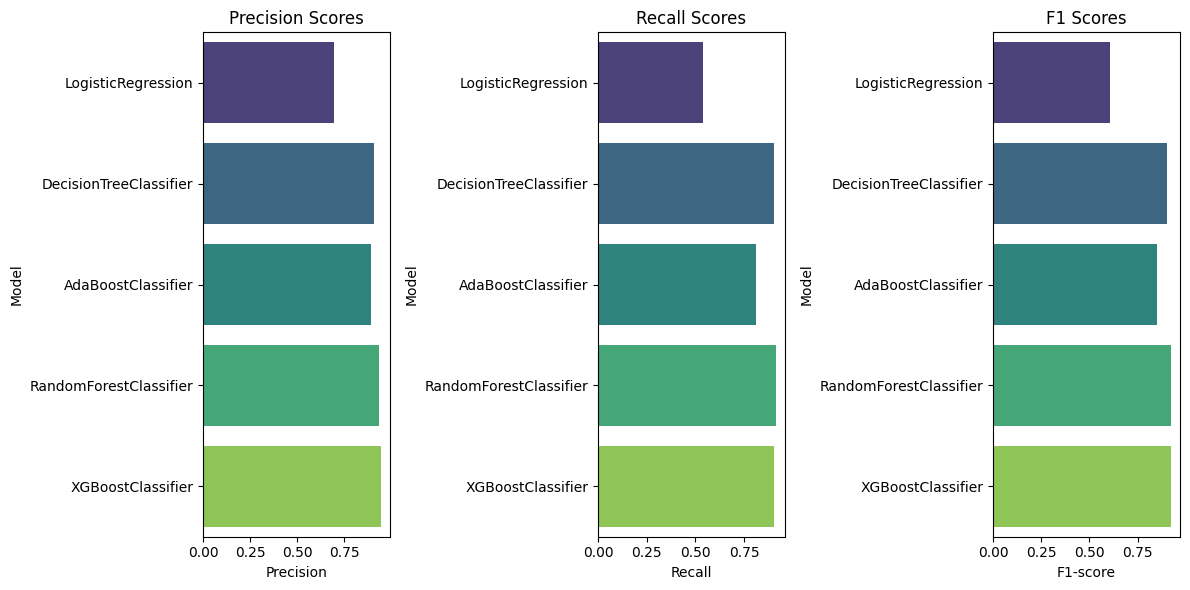

Model: LogisticRegression
Precision: 0.70, Recall: 0.54, F1-score: 0.61

Model: DecisionTreeClassifier
Precision: 0.91, Recall: 0.90, F1-score: 0.91

Model: AdaBoostClassifier
Precision: 0.89, Recall: 0.81, F1-score: 0.85

Model: RandomForestClassifier
Precision: 0.93, Recall: 0.91, F1-score: 0.92

Model: XGBoostClassifier
Precision: 0.94, Recall: 0.90, F1-score: 0.92

Best Model based on F1-score: RandomForestClassifier


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming lr_pred, dt_pred, svc_pred, abc_pred, rfc_pred, xgb_pred, nbc_pred are your predicted variables
# Dictionary to store model names and corresponding scores
model_scores = {}

# Define models and their corresponding predictions
models = ['LogisticRegression', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'XGBoostClassifier']
predictions = [lr_pred, dt_pred, abc_pred, rfc_pred, xgb_pred]

# Calculate precision, recall, and f1-score for each model
for model_name, y_pred in zip(models, predictions):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_scores[model_name] = {'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Extract scores for plotting
precision_scores = [model_scores[model]['Precision'] for model in models]
recall_scores = [model_scores[model]['Recall'] for model in models]
f1_scores = [model_scores[model]['F1-score'] for model in models]

# Create a DataFrame for easier plotting
import pandas as pd

scores_df = pd.DataFrame({
    'Model': models,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Plotting
plt.figure(figsize=(12, 6))

# Precision plot
plt.subplot(1, 3, 1)
sns.barplot(x='Precision', y='Model', data=scores_df, palette='viridis')
plt.title('Precision Scores')

# Recall plot
plt.subplot(1, 3, 2)
sns.barplot(x='Recall', y='Model', data=scores_df, palette='viridis')
plt.title('Recall Scores')

# F1-score plot
plt.subplot(1, 3, 3)
sns.barplot(x='F1-score', y='Model', data=scores_df, palette='viridis')
plt.title('F1 Scores')

plt.tight_layout()
plt.show()

# Print the scores for each model
for model_name, scores in model_scores.items():
    print(f"Model: {model_name}")
    print(f"Precision: {scores['Precision']:.2f}, Recall: {scores['Recall']:.2f}, F1-score: {scores['F1-score']:.2f}")
    print()

# Choose the best model based on F1-score
best_model = max(model_scores, key=lambda k: model_scores[k]['F1-score'])
print(f"Best Model based on F1-score: {best_model}")

C:\Users\sarka\AppData\Local\Temp\ipykernel_17172\327222935.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Precision', y='Model', data=scores_df, palette='viridis')
C:\Users\sarka\AppData\Local\Temp\ipykernel_17172\327222935.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Recall', y='Model', data=scores_df, palette='viridis')
C:\Users\sarka\AppData\Local\Temp\ipykernel_17172\327222935.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x='F1-score', y='Model', data=scores_df, palette='viridis')


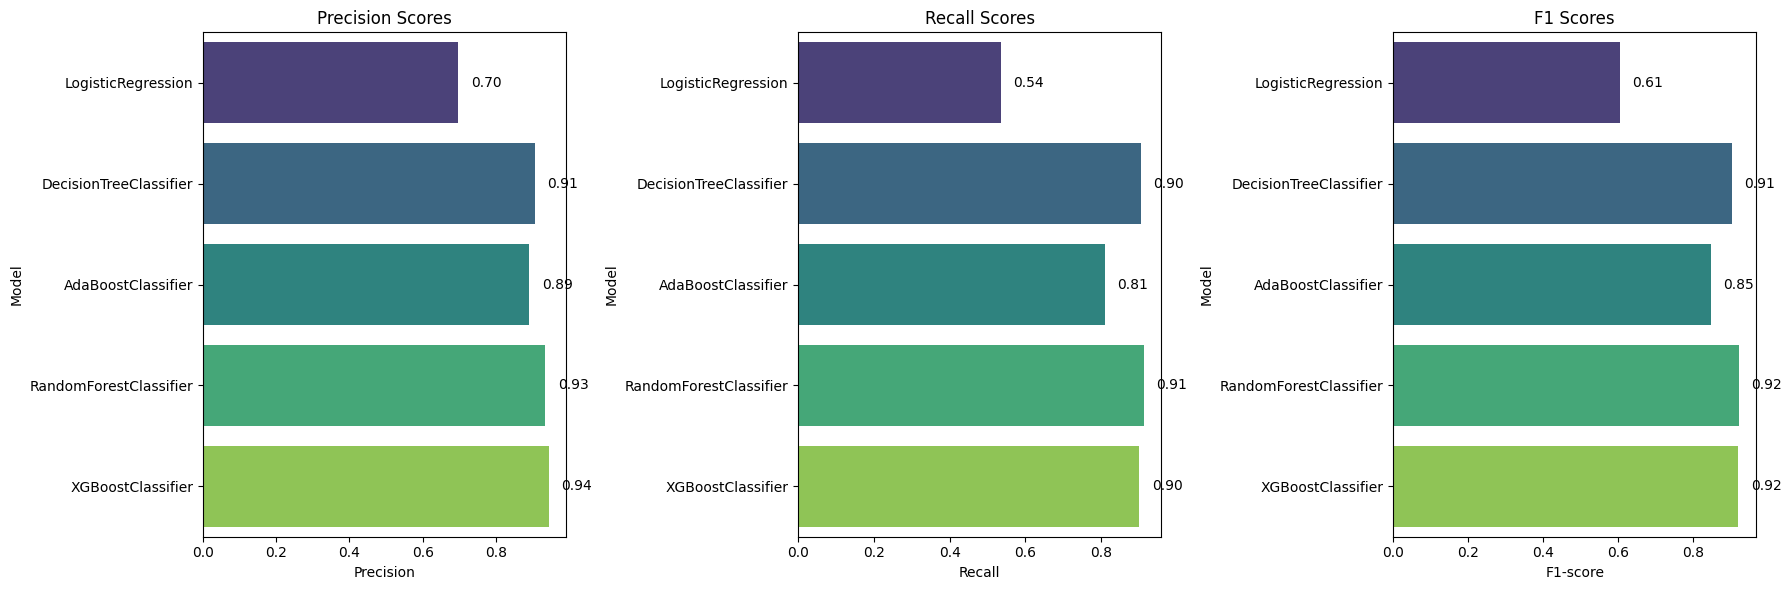

Model: LogisticRegression
Precision: 0.70, Recall: 0.54, F1-score: 0.61

Model: DecisionTreeClassifier
Precision: 0.91, Recall: 0.90, F1-score: 0.91

Model: AdaBoostClassifier
Precision: 0.89, Recall: 0.81, F1-score: 0.85

Model: RandomForestClassifier
Precision: 0.93, Recall: 0.91, F1-score: 0.92

Model: XGBoostClassifier
Precision: 0.94, Recall: 0.90, F1-score: 0.92

Best Model based on F1-score: RandomForestClassifier


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming lr_pred, dt_pred, abc_pred, rfc_pred, xgb_pred are your predicted variables
# Dictionary to store model names and corresponding scores
model_scores = {}

# Define models and their corresponding predictions
models = ['LogisticRegression', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'XGBoostClassifier']
predictions = [lr_pred, dt_pred, abc_pred, rfc_pred, xgb_pred]

# Calculate precision, recall, and f1-score for each model
for model_name, y_pred in zip(models, predictions):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_scores[model_name] = {'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Extract scores for plotting
precision_scores = [model_scores[model]['Precision'] for model in models]
recall_scores = [model_scores[model]['Recall'] for model in models]
f1_scores = [model_scores[model]['F1-score'] for model in models]

# Create a DataFrame for easier plotting
scores_df = pd.DataFrame({
    'Model': models,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Plotting
plt.figure(figsize=(18, 6))

# Function to add value labels on bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.2f'), 
                   (p.get_width(), p.get_y() + p.get_height() / 2.), 
                   ha = 'center', va = 'center', 
                   xytext = (20, 0), 
                   textcoords = 'offset points')

# Precision plot
plt.subplot(1, 3, 1)
ax1 = sns.barplot(x='Precision', y='Model', data=scores_df, palette='viridis')
plt.title('Precision Scores')
add_value_labels(ax1)

# Recall plot
plt.subplot(1, 3, 2)
ax2 = sns.barplot(x='Recall', y='Model', data=scores_df, palette='viridis')
plt.title('Recall Scores')
add_value_labels(ax2)

# F1-score plot
plt.subplot(1, 3, 3)
ax3 = sns.barplot(x='F1-score', y='Model', data=scores_df, palette='viridis')
plt.title('F1 Scores')
add_value_labels(ax3)

plt.tight_layout()
plt.show()

# Print the scores for each model
for model_name, scores in model_scores.items():
    print(f"Model: {model_name}")
    print(f"Precision: {scores['Precision']:.2f}, Recall: {scores['Recall']:.2f}, F1-score: {scores['F1-score']:.2f}")
    print()

# Choose the best model based on F1-score
best_model = max(model_scores, key=lambda k: model_scores[k]['F1-score'])
print(f"Best Model based on F1-score: {best_model}")


C:\Users\sarka\AppData\Local\Temp\ipykernel_17172\1846376411.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Precision', y='Model', data=scores_df, palette='viridis')


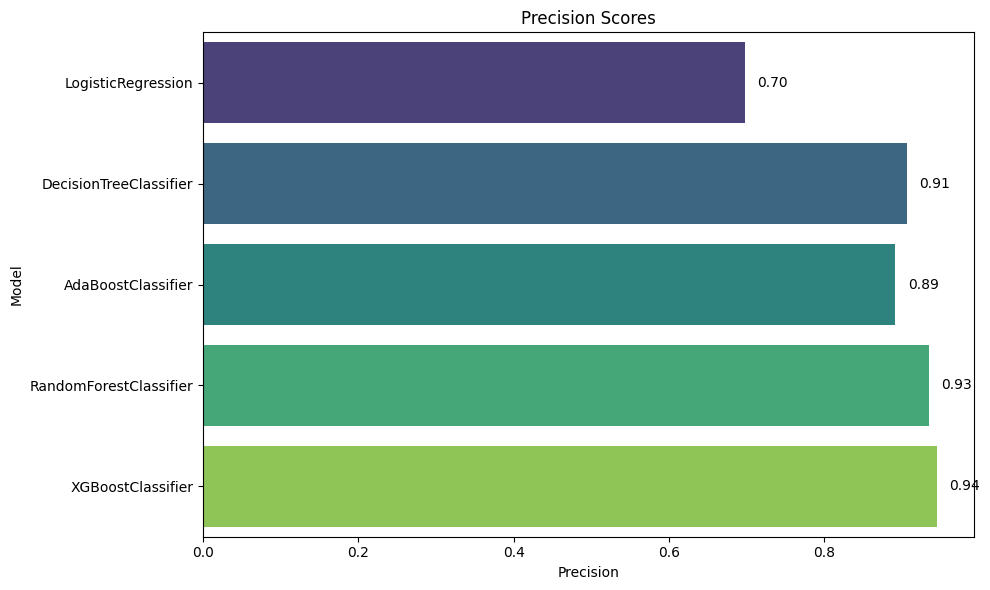

C:\Users\sarka\AppData\Local\Temp\ipykernel_17172\1846376411.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Recall', y='Model', data=scores_df, palette='viridis')


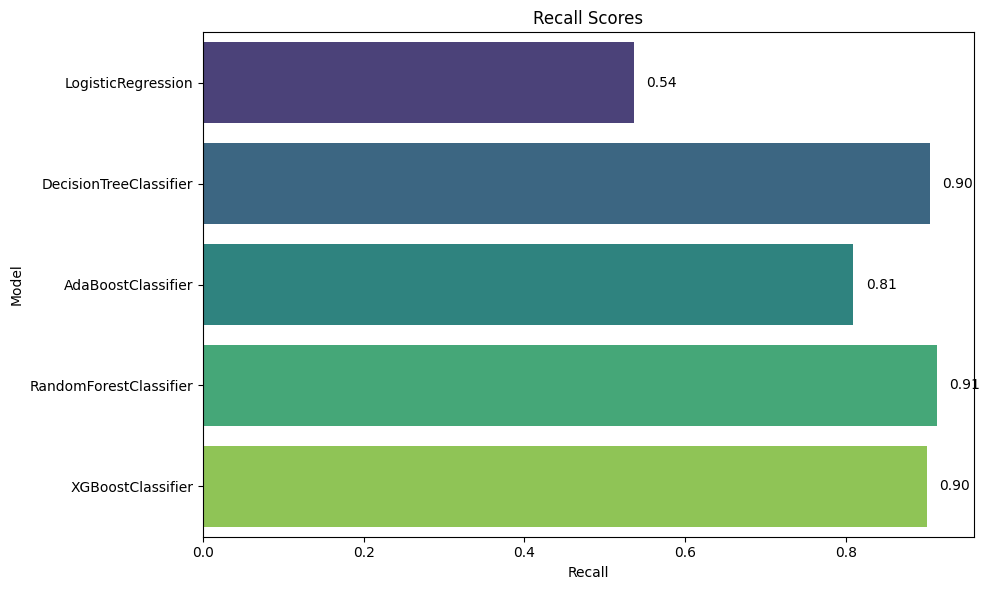

C:\Users\sarka\AppData\Local\Temp\ipykernel_17172\1846376411.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x='F1-score', y='Model', data=scores_df, palette='viridis')


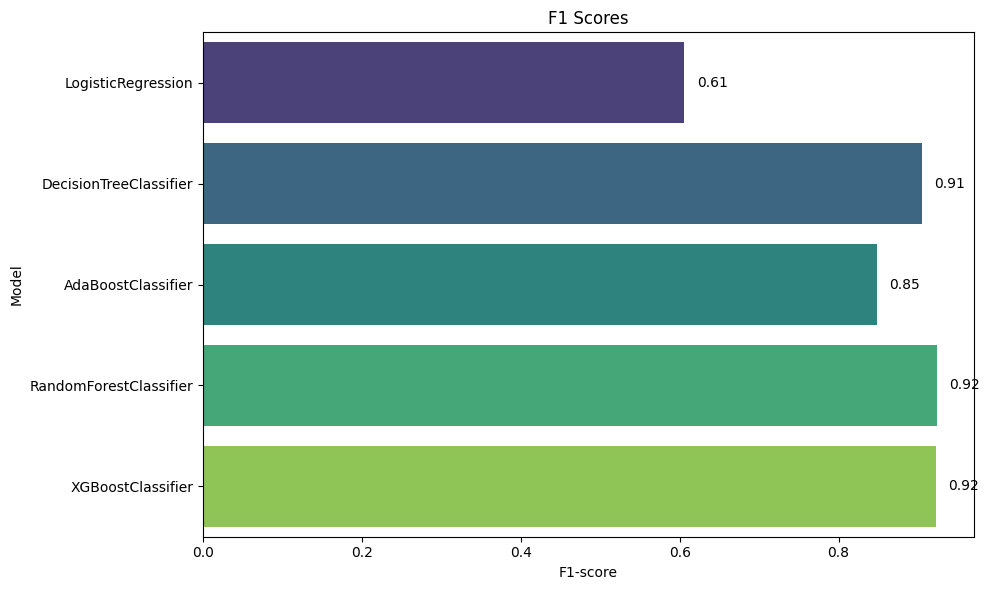

Model: LogisticRegression
Precision: 0.70, Recall: 0.54, F1-score: 0.61

Model: DecisionTreeClassifier
Precision: 0.91, Recall: 0.90, F1-score: 0.91

Model: AdaBoostClassifier
Precision: 0.89, Recall: 0.81, F1-score: 0.85

Model: RandomForestClassifier
Precision: 0.93, Recall: 0.91, F1-score: 0.92

Model: XGBoostClassifier
Precision: 0.94, Recall: 0.90, F1-score: 0.92

Best Model based on F1-score: RandomForestClassifier


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming lr_pred, dt_pred, abc_pred, rfc_pred, xgb_pred are your predicted variables
# Dictionary to store model names and corresponding scores
model_scores = {}

# Define models and their corresponding predictions
models = ['LogisticRegression', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'XGBoostClassifier']
predictions = [lr_pred, dt_pred, abc_pred, rfc_pred, xgb_pred]

# Calculate precision, recall, and f1-score for each model
for model_name, y_pred in zip(models, predictions):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_scores[model_name] = {'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Extract scores for plotting
precision_scores = [model_scores[model]['Precision'] for model in models]
recall_scores = [model_scores[model]['Recall'] for model in models]
f1_scores = [model_scores[model]['F1-score'] for model in models]

# Create a DataFrame for easier plotting
scores_df = pd.DataFrame({
    'Model': models,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Function to add value labels on bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.2f'), 
                   (p.get_width(), p.get_y() + p.get_height() / 2.), 
                   ha = 'center', va = 'center', 
                   xytext = (20, 0), 
                   textcoords = 'offset points')

# Plotting Precision Scores
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='Precision', y='Model', data=scores_df, palette='viridis')
plt.title('Precision Scores')
add_value_labels(ax1)
plt.tight_layout()
plt.savefig('precision.png')
plt.show()

# Plotting Recall Scores
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='Recall', y='Model', data=scores_df, palette='viridis')
plt.title('Recall Scores')
add_value_labels(ax2)
plt.tight_layout()
plt.savefig('recall.png')
plt.show()

# Plotting F1 Scores
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='F1-score', y='Model', data=scores_df, palette='viridis')
plt.title('F1 Scores')
add_value_labels(ax3)
plt.tight_layout()
plt.savefig('f1.png')
plt.show()

# Print the scores for each model
for model_name, scores in model_scores.items():
    print(f"Model: {model_name}")
    print(f"Precision: {scores['Precision']:.2f}, Recall: {scores['Recall']:.2f}, F1-score: {scores['F1-score']:.2f}")
    print()

# Choose the best model based on F1-score
best_model = max(model_scores, key=lambda k: model_scores[k]['F1-score'])
print(f"Best Model based on F1-score: {best_model}")



In [50]:
x_train.shape

(339738, 47)